In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/polls_questionpiece.parquet'

# 데이터 불러오기
questionpiece_df = pd.read_parquet(gcs_path, engine='pyarrow')
questionpiece_df

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0
...,...,...,...,...,...
1265471,208385226,0,2024-05-07 11:32:30,960,0
1265472,208385227,0,2024-05-07 11:32:30,1402,0
1265473,208385228,0,2024-05-07 11:32:30,1676,0
1265474,208385229,0,2024-05-07 11:32:30,3115,0


In [20]:
questionpiece_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265476 entries, 0 to 1265475
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1265476 non-null  int64         
 1   is_voted     1265476 non-null  int64         
 2   created_at   1265476 non-null  datetime64[ns]
 3   question_id  1265476 non-null  int64         
 4   is_skipped   1265476 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 48.3 MB


In [21]:
questionpiece_df.isnull().sum()

id             0
is_voted       0
created_at     0
question_id    0
is_skipped     0
dtype: int64

In [22]:
questionpiece_df.describe(include='all')

,id,is_voted,created_at,question_id,is_skipped
count,1.265476e+06,1.265476e+06,1265476,1.265476e+06,1.265476e+06
mean,7.658001e+07,9.630266e-01,2023-05-17 13:39:58.427317504,7.133598e+02,8.905740e-04
min,9.984580e+05,0.000000e+00,2023-04-28 12:27:22,9.900000e+01,0.000000e+00
25%,2.029260e+07,1.000000e+00,2023-05-09 21:50:54,2.780000e+02,0.000000e+00
50%,6.846533e+07,1.000000e+00,2023-05-15 14:18:31.500000,4.770000e+02,0.000000e+00
75%,1.212662e+08,1.000000e+00,2023-05-22 09:56:44,9.820000e+02,0.000000e+00
max,2.083852e+08,1.000000e+00,2024-05-07 11:32:30,5.133000e+03,1.000000e+00
std,5.912924e+07,1.886967e-01,NaN,6.706815e+02,2.982921e-02


In [23]:
# is_voted=0 인 데이터 추출
voted_0_df = questionpiece_df[questionpiece_df['is_voted'] == 0]

# 전체 비중 확인
print(f"총 데이터 수: {len(questionpiece_df)}")
print(f"is_voted = 0 인 수: {len(voted_0_df)} ({len(voted_0_df)/len(questionpiece_df)*100:.4f}%)")


총 데이터 수: 1265476
is_voted = 0 인 수: 46789 (3.6973%)


- 전체 1,265,476건 중 46,789건(3.70%)만 is_voted = 0
→ 대부분의 항목은 투표되었으며, 비투표 사례는 소수

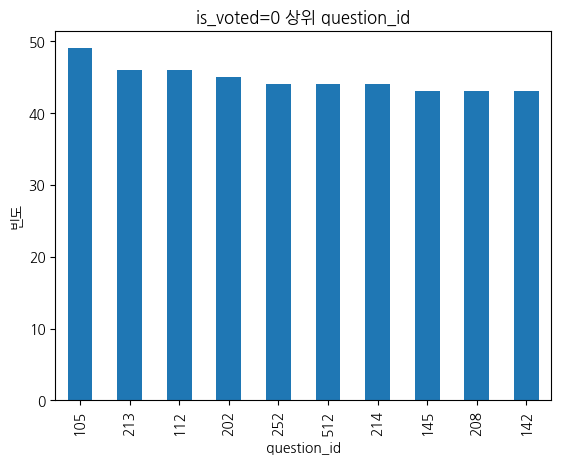

In [24]:
# question_id별 is_voted=0 분포
voted_0_by_qid = voted_0_df['question_id'].value_counts().head(10)

# 시각화

voted_0_by_qid.plot(kind='bar', title='is_voted=0 상위 question_id')
plt.xlabel('question_id')
plt.ylabel('빈도')
plt.show()


- question_id=105, 213, 112 등 특정 질문에서만 소폭 높은 비율 (상위 질문도 50건 내외)
- → 특정 질문에 과도하게 몰린 현상은 아님
- 전반적으로 분산된 분포로 해석 가능

/tmp/ipykernel_1768755/2053723894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voted_0_df['created_at'] = pd.to_datetime(voted_0_df['created_at'])
/tmp/ipykernel_1768755/2053723894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voted_0_df['created_date'] = voted_0_df['created_at'].dt.date


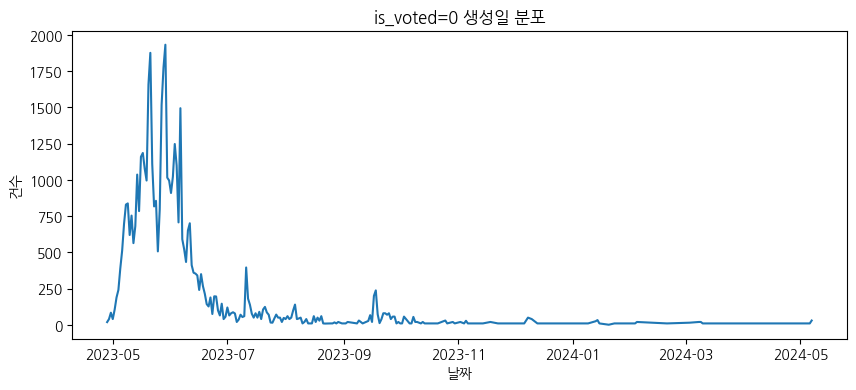

In [25]:
# datetime 변환
voted_0_df['created_at'] = pd.to_datetime(voted_0_df['created_at'])

# 일자별 투표 안한 건수
voted_0_df['created_date'] = voted_0_df['created_at'].dt.date
voted_0_df['created_date'].value_counts().sort_index().plot(kind='line', figsize=(10,4), title='is_voted=0 생성일 분포')
plt.xlabel('날짜')
plt.ylabel('건수')
plt.show()

- 비투표 항목의 대부분이 2023년 5월~6월 사이 집중 발생
- 그 이후부터는 거의 없음
- → 서비스 초기 또는 특정 기간에 시스템적 문제 혹은 유저 행동 패턴 이슈 가능성



In [26]:
# 스킵 여부 비율
skipped_counts = voted_0_df['is_skipped'].value_counts(normalize=True)
print("is_voted=0인 경우의 is_skipped 비율:")
print(skipped_counts)

is_voted=0인 경우의 is_skipped 비율:
is_skipped
0    1.0
Name: proportion, dtype: float64


- is_voted = 0인 경우 100%가 is_skipped = 0
- → 사용자는 해당 항목을 스킵하지 않았지만 투표도 하지 않음

In [27]:
# 특정 질문에서 투표 유무 비교
sample_qid = voted_0_df['question_id'].value_counts().idxmax()

subset = questionpiece_df[questionpiece_df['question_id'] == sample_qid]
summary = subset.groupby(['is_voted', 'is_skipped']).size()
print(f"question_id={sample_qid} 행동 요약:")
print(summary)

question_id=105 행동 요약:
is_voted  is_skipped
0         0               49
1         0             1787
dtype: int64


<Axes: title={'center': '날짜별 is_voted 분포 (0 vs 1)'}, xlabel='date'>

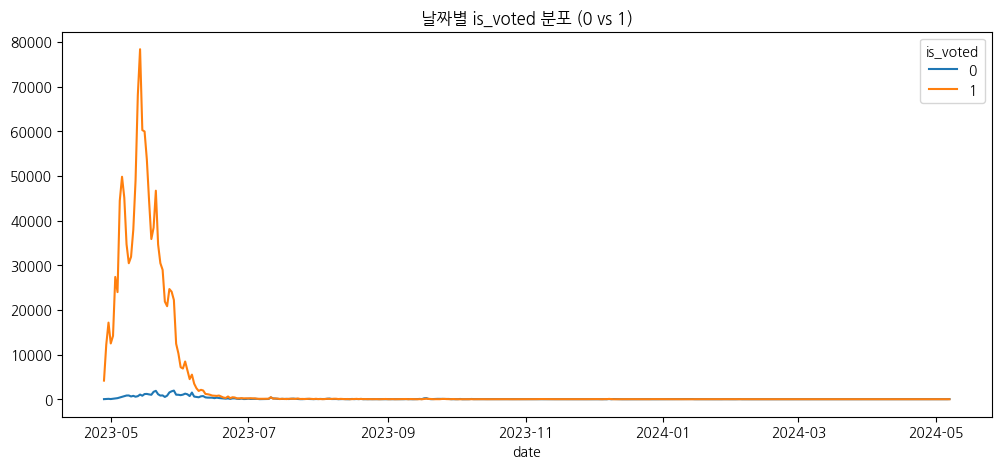

In [28]:
# 전체 데이터 기준 날짜별 투표 비율 비교
questionpiece_df['created_at'] = pd.to_datetime(questionpiece_df['created_at'])
questionpiece_df['date'] = questionpiece_df['created_at'].dt.date

pivot = questionpiece_df.pivot_table(index='date', columns='is_voted', values='id', aggfunc='count').fillna(0)
pivot.plot(title='날짜별 is_voted 분포 (0 vs 1)', figsize=(12,5))

In [29]:
# question_id별 is_voted=0 비율 계산
question_vote_summary = questionpiece_df.groupby('question_id')['is_voted'].value_counts(normalize=True).unstack().fillna(0)
question_vote_summary = question_vote_summary.sort_values(0, ascending=False)  # is_voted=0 비율 높은 순
question_vote_summary.head(10)

is_voted,0,1
question_id,,
4208,1.0,0.0
4407,1.0,0.0
4411,1.0,0.0
4814,1.0,0.0
4577,1.0,0.0
4420,1.0,0.0
4571,1.0,0.0
4999,1.0,0.0
4427,1.0,0.0


In [30]:
# 비정상 질문 ID 리스트
abnormal_qids = [4208, 4407, 4411, 4814, 4577, 4420, 4571, 4999, 4427, 5075]

# 각 question_id에 대한 전체 수 (혹시 복수 row가 있는지)
questionpiece_df[questionpiece_df['question_id'].isin(abnormal_qids)]['question_id'].value_counts()


question_id
4427    3
4814    2
4577    1
4999    1
4420    1
5075    1
4411    1
4407    1
4571    1
4208    1
Name: count, dtype: int64

In [31]:
questionpiece_df[questionpiece_df['question_id'].isin(abnormal_qids)][['question_id', 'created_at']]


,question_id,created_at
1251212,4577,2023-06-25 07:31:39
1252013,4999,2023-06-27 05:21:53
1252568,4420,2023-06-28 23:24:58
1254102,4814,2023-07-04 10:45:05
1255511,4427,2023-07-11 09:36:42
1256566,5075,2023-07-13 14:48:46
1257220,4411,2023-07-18 10:36:38
1259977,4814,2023-08-08 03:20:21
1260863,4407,2023-08-19 15:41:54
1260996,4427,2023-08-20 15:31:54


In [32]:
# 전체 데이터에서 해당 question_id가 1회만 등장했는지 확인
question_counts = questionpiece_df['question_id'].value_counts()
question_counts[question_counts.index.isin(abnormal_qids)]


question_id
4427    3
4814    2
4407    1
4208    1
4577    1
4571    1
4999    1
5075    1
4420    1
4411    1
Name: count, dtype: int64

In [33]:
# 1. question_id별 등장 횟수
qid_counts = questionpiece_df['question_id'].value_counts()

# 2. 전체 row 수가 3개 이하인 question_id만 추출
sparse_qids = qid_counts[qid_counts <= 3].index

# 3. 비정상 조건 필터링
abnormal_rows = questionpiece_df[
    (questionpiece_df['question_id'].isin(sparse_qids)) &
    (questionpiece_df['is_voted'] == 0) &
    (questionpiece_df['is_skipped'] == 0)
]

# 결과 확인
print(f"비정상 row 수: {len(abnormal_rows)}")
abnormal_rows.head()

비정상 row 수: 507


,id,is_voted,created_at,question_id,is_skipped,date
1243788,199688765,0,2023-06-15 12:13:09,4496,0,2023-06-15
1243792,199688769,0,2023-06-15 12:13:09,4195,0,2023-06-15
1250750,202548937,0,2023-06-24 12:09:37,4662,0,2023-06-24
1250753,202548940,0,2023-06-24 12:09:37,4195,0,2023-06-24
1250809,202582971,0,2023-06-24 13:27:53,4938,0,2023-06-24


In [38]:

questionpiece_df = pd.read_parquet('gs://final_project_enuyu/data/final_project/votes/polls_questionpiece.parquet')
userquestionrecord_df = pd.read_parquet('gs://final_project_enuyu/data/final_project/votes/accounts_userquestionrecord.parquet')

# Merge on 'id' to bring in user_id
merged_df = questionpiece_df.merge(userquestionrecord_df[['id', 'user_id']], on='id', how='left')

# Show merged result
merged_df.shape, merged_df.columns, merged_df.head()


((1265476, 6),
 Index(['id', 'is_voted', 'created_at', 'question_id', 'is_skipped', 'user_id'], dtype='object'),
        id  is_voted          created_at  question_id  is_skipped  user_id
 0  998458         1 2023-04-28 12:27:22          252           0      NaN
 1  998459         1 2023-04-28 12:27:22          244           0      NaN
 2  998460         1 2023-04-28 12:27:22          183           0      NaN
 3  998461         1 2023-04-28 12:27:22          101           0      NaN
 4  998462         1 2023-04-28 12:27:22          209           0      NaN)

In [40]:
# 1. 병합 키 생성 (question_id + created_at)
questionpiece_df['merge_key'] = questionpiece_df['question_id'].astype(str) + "_" + questionpiece_df['created_at'].astype(str)
userquestionrecord_df['merge_key'] = userquestionrecord_df['question_id'].astype(str) + "_" + userquestionrecord_df['created_at'].astype(str)

# 2. 병합: merge_key 기준으로 user_id 붙이기
merged_df = questionpiece_df.merge(userquestionrecord_df[['merge_key', 'user_id']], on='merge_key', how='left')

# 3. 유저별 스킵 통계 계산
user_skip_stats = merged_df.groupby('user_id')['is_skipped'].agg(['sum', 'count']).reset_index()
user_skip_stats.columns = ['user_id', 'skip_count', 'total_questions']
user_skip_stats['skip_rate'] = user_skip_stats['skip_count'] / user_skip_stats['total_questions']

# 4. 스킵 많이 한 유저 상위 10명 추출
top_skippers = user_skip_stats.sort_values(by='skip_count', ascending=False).head(10)
print(top_skippers)


       user_id  skip_count  total_questions  skip_rate
532   931987.0           1                1        1.0
0     840473.0           0                1        0.0
801  1135238.0           0                1        0.0
858  1150928.0           0                1        0.0
857  1150297.0           0                1        0.0
856  1149594.0           0                1        0.0
855  1148848.0           0                3        0.0
854  1148730.0           0                1        0.0
853  1148514.0           0                1        0.0
852  1148486.0           0                1        0.0


In [46]:
# 스킵 횟수가 1회 이상인 유저만 추출
skipped_users = user_skip_stats[user_skip_stats['skip_count'] > 0]

# 스킵 횟수 기준 상위 유저 10명 보기
top_skippers = skipped_users.sort_values(by='skip_count', ascending=False).head(10)
print(top_skippers)


      user_id  skip_count  total_questions  skip_rate
532  931987.0           1                1        1.0


#### 질문이 오픈된 시간대(opening_time)에 따라 투표율(is_voted)에 차이가 있는가?

In [14]:
import ast

# 문자열을 실제 리스트로 변환
qset_df = pd.read_parquet("gs://final_project_enuyu/data/final_project/votes/polls_questionset.parquet")
qset_df['question_piece_id_list'] = qset_df['question_piece_id_list'].apply(ast.literal_eval)

# explode (리스트 -> 행으로 분리)
qset_df = qset_df.explode("question_piece_id_list")

# 병합을 위한 타입 통일 (int로 맞추기)
piece_df = pd.read_parquet("gs://final_project_enuyu/data/final_project/votes/polls_questionpiece.parquet")
qset_df['question_piece_id_list'] = qset_df['question_piece_id_list'].astype(int)
piece_df['id'] = piece_df['id'].astype(int)

# 병합
piece_df = piece_df.merge(
    qset_df[['question_piece_id_list', 'opening_time']],
    left_on='id',
    right_on='question_piece_id_list',
    how='left'
)


In [15]:
# 투표율 분석용 파생 컬럼
piece_df['is_voted'] = piece_df['is_voted'].fillna(0)
piece_df['opening_time'] = pd.to_datetime(piece_df['opening_time'], errors='coerce')
piece_df['open_hour'] = piece_df['opening_time'].dt.hour

# 시간대별 투표율
vote_stats_by_hour = piece_df.groupby('open_hour').agg(
    total_count=('id', 'count'),
    vote_count=('is_voted', 'sum')
).reset_index()
vote_stats_by_hour['vote_rate'] = vote_stats_by_hour['vote_count'] / vote_stats_by_hour['total_count']


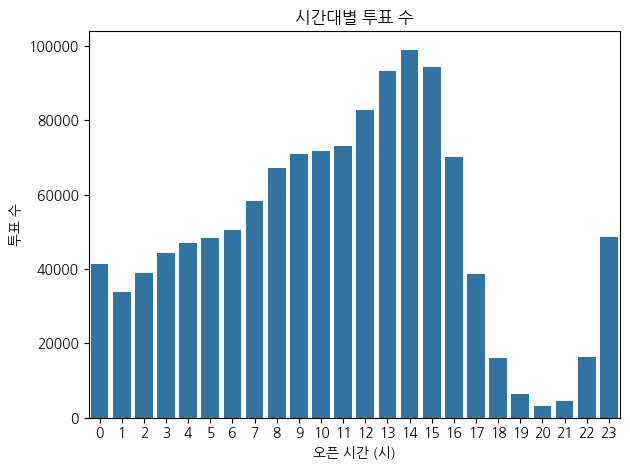

,open_hour,vote_count
0,0,41286
1,1,33680
2,2,38971
3,3,44224
4,4,47088
5,5,48457
6,6,50495
7,7,58306
8,8,67273
9,9,70824


In [22]:
vote_count_by_hour = piece_df.groupby('open_hour')['is_voted'].sum().reset_index(name='vote_count')

sns.barplot(data=vote_count_by_hour, x='open_hour', y='vote_count')
plt.title('시간대별 투표 수')
plt.xlabel('오픈 시간 (시)')
plt.ylabel('투표 수')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

vote_count_by_hour

In [18]:
print(piece_df['opening_time'].isna().mean())  # 1.0이면 100% 결측
print(piece_df[['id', 'opening_time']].dropna().head())


0.0
       id        opening_time
0  998458 2023-04-28 12:27:22
1  998459 2023-04-28 12:27:22
2  998460 2023-04-28 12:27:22
3  998461 2023-04-28 12:27:22
4  998462 2023-04-28 12:27:22


#### 스킵률 분석

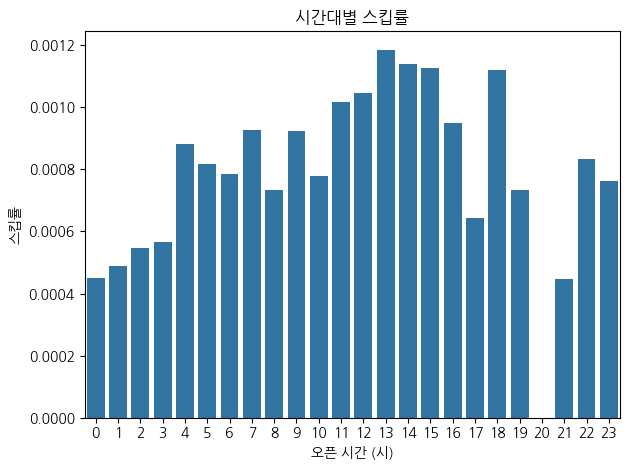

,open_hour,is_skipped
0,0,0.000448
1,1,0.000489
2,2,0.000547
3,3,0.000567
4,4,0.000883
5,5,0.000818
6,6,0.000785
7,7,0.000927
8,8,0.000735
9,9,0.000924


In [21]:
piece_df['is_skipped'] = piece_df['is_skipped'].fillna(0)
skip_rate_by_hour = piece_df.groupby('open_hour')['is_skipped'].mean().reset_index()

sns.barplot(data=skip_rate_by_hour, x='open_hour', y='is_skipped')
plt.title('시간대별 스킵률')
plt.xlabel('오픈 시간 (시)')
plt.ylabel('스킵률')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


skip_rate_by_hour

#### 스킵률은 낮고, 투표율은 높은 고효율 시간대

In [23]:
# 전처리
piece_df['is_voted'] = piece_df['is_voted'].fillna(0)
piece_df['is_skipped'] = piece_df['is_skipped'].fillna(0)
piece_df['open_hour'] = pd.to_datetime(piece_df['opening_time']).dt.hour

# 시간대별 집계
efficiency_df = piece_df.groupby('open_hour').agg(
    total_count=('id', 'count'),
    vote_count=('is_voted', 'sum'),
    skip_count=('is_skipped', 'sum')
).reset_index()

# 비율 계산
efficiency_df['vote_rate'] = efficiency_df['vote_count'] / efficiency_df['total_count']
efficiency_df['skip_rate'] = efficiency_df['skip_count'] / efficiency_df['total_count']


In [24]:
# 기준값 (예: 상위 30% 투표율 & 하위 30% 스킵률)
vote_threshold = efficiency_df['vote_rate'].quantile(0.7)
skip_threshold = efficiency_df['skip_rate'].quantile(0.3)

# 고효율 시간대 필터링
high_efficiency_hours = efficiency_df[
    (efficiency_df['vote_rate'] >= vote_threshold) &
    (efficiency_df['skip_rate'] <= skip_threshold)
]

display(high_efficiency_hours[['open_hour', 'vote_rate', 'skip_rate', 'total_count']])


,open_hour,vote_rate,skip_rate,total_count
0,0,0.974301,0.000448,42375
1,1,0.969460,0.000489,34741
2,2,0.968127,0.000547,40254
21,21,0.973890,0.000446,4481


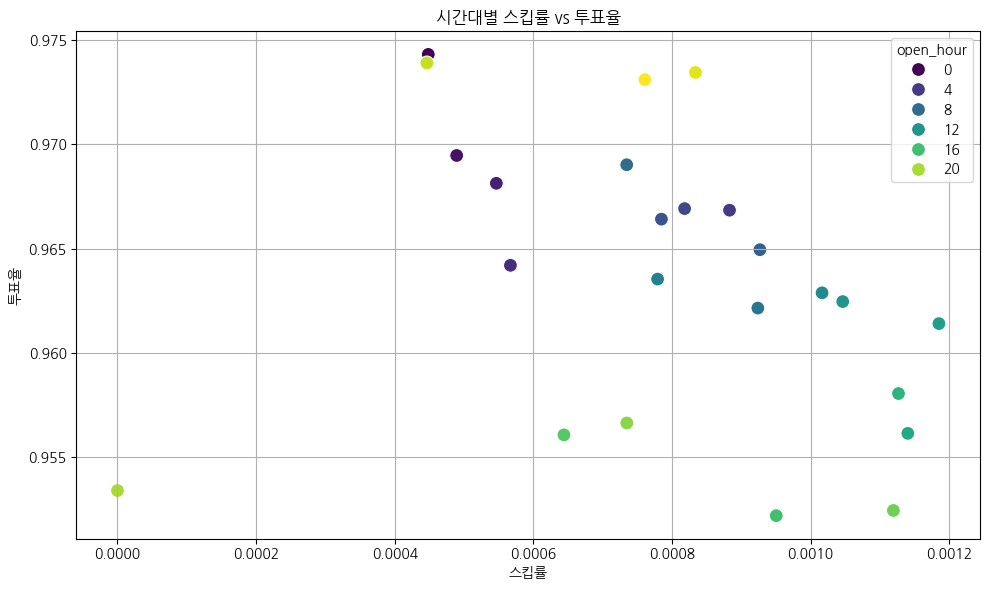

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=efficiency_df, x='skip_rate', y='vote_rate', hue='open_hour', palette='viridis', s=100)
plt.title('시간대별 스킵률 vs 투표율')
plt.xlabel('스킵률')
plt.ylabel('투표율')
plt.grid(True)
plt.tight_layout()
plt.show()

- 0시 & 21시는 모두 투표율도 높고 스킵률도 낮은 고효율 시간대
- 특히 21시는 스킵률이 가장 낮고, 참여자는 적지만 집중도가 매우 높은 시간
- 야간 유저층은 질문 노출 수는 적지만 반응은 매우 긍정적